In [1]:
pip install pandas

In [2]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

df = pd.read_csv("netflix_reviews.csv")  # 파일 불러오기

In [4]:
# 상단 5개 데이터
top_5 = df.head()

# 하단 5개 데이터
bottom_5 = df.tail()

# 컬럼명
columns = df.columns

# 데이터프레임의 shape
shape = df.shape

# 출력
print("상단 5개 데이터:\n",top_5)
print("\n하단 5개 데이터:\n",bottom_5)
print("\n컬럼명:\n",columns)
print("\n데이터프레임의 shape",shape)

상단 5개 데이터:
                                reviewId               userName  \
0  65ae4898-8007-47e3-92cd-ba06eac04574  Moosa Sam (Moosa Sam)   
1  3cc99dd8-81f1-47ce-8b78-18c29719a941           PixEndstar53   
2  1c639697-a825-4f11-b966-3e7cfb6eb292             JanCan1 GK   
3  240cfd35-f94d-42d6-b145-154097dd2ce0           Brother Bear   
4  c568b9f0-7b52-4dad-9b89-f57882014138              Riya Adak   

                                             content  score  thumbsUpCount  \
0  This App Not Supporting My Device ROG3 Mobile!...      1              0   
1  I'm getting very tired, you guys keep logging ...      2              0   
2  One of my go to channels..l was at least 4 mov...      5              0   
3                      Poor scripts, Violent content      2              0   
4                                               Good      3              0   

     reviewCreatedVersion                   at              appVersion  
0   8.137.0 build 4 50942  2024-10-23 13:47:33   

In [32]:
import re
# 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

In [33]:
df["preproces_content"] = df['content'].apply(preprocess_text)

In [34]:
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,preproces_content
0,65ae4898-8007-47e3-92cd-ba06eac04574,Moosa Sam (Moosa Sam),This App Not Supporting My Device ROG3 Mobile!...,1,0,8.137.0 build 4 50942,2024-10-23 13:47:33,8.137.0 build 4 50942,this app not supporting my device rog mobile k...
1,3cc99dd8-81f1-47ce-8b78-18c29719a941,PixEndstar53,"I'm getting very tired, you guys keep logging ...",2,0,8.137.0 build 4 50942,2024-10-23 13:27:18,8.137.0 build 4 50942,im getting very tired you guys keep logging me...
2,1c639697-a825-4f11-b966-3e7cfb6eb292,JanCan1 GK,One of my go to channels..l was at least 4 mov...,5,0,8.132.2 build 18 50846,2024-10-23 13:26:51,8.132.2 build 18 50846,one of my go to channelsl was at least movies...
3,240cfd35-f94d-42d6-b145-154097dd2ce0,Brother Bear,"Poor scripts, Violent content",2,0,NaN,2024-10-23 13:19:59,NaN,poor scripts violent content
4,c568b9f0-7b52-4dad-9b89-f57882014138,Riya Adak,Good,3,0,8.137.0 build 4 50942,2024-10-23 13:16:59,8.137.0 build 4 50942,good


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt

In [9]:
리뷰데이터 = df['score'].value_counts().reset_index()
리뷰데이터.columns = ['score', 'count']  # 열 이름 변경

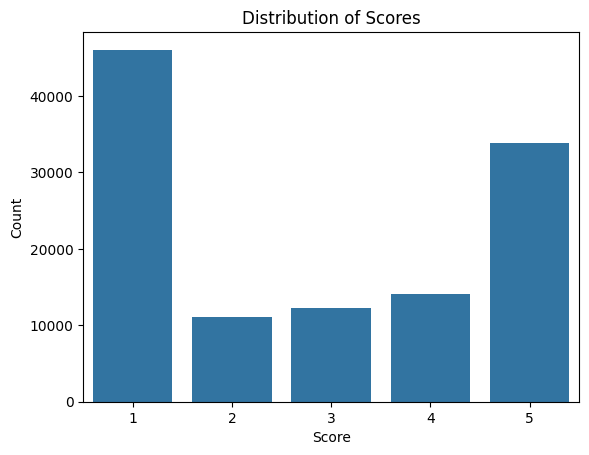

In [10]:
sns.barplot(x='score', y='count', data=리뷰데이터)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

In [11]:
conda install pytorch torchvision torchaudio cpuonly -c pytorch


Channels:
 - pytorch
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [12]:
conda install -c pytorch torchtext


Channels:
 - pytorch
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [13]:
conda update torchtext


Channels:
 - defaults
 - conda-forge
 - pytorch
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [14]:
conda install pytorch torchvision torchaudio torchtext -c pytorch


Channels:
 - pytorch
 - defaults
 - conda-forge
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [15]:
pip show torchtext


Name: torchtext
Version: 0.18.0
Summary: Text utilities, models, transforms, and datasets for PyTorch.
Home-page: https://github.com/pytorch/text
Author: PyTorch Text Team
Author-email: packages@pytorch.org
License: BSD
Location: d:\kjml\anaconda\envs\myenv\Lib\site-packages
Requires: numpy, requests, torch, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install --upgrade torchtext


In [17]:
pip install torch torchtext --upgrade


Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


# 데이터셋 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, reviews, ratings, text_pipeline, label_pipeline):
        self.reviews = reviews
        self.ratings = ratings
        self.text_pipeline = text_pipeline
        self.label_pipeline = label_pipeline

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = self.text_pipeline(self.reviews[idx])
        rating = self.label_pipeline(self.ratings[idx])
        return torch.tensor(review), torch.tensor(rating)

# 데이터셋 정의
train_dataset = ReviewDataset(train_reviews, train_ratings, text_pipeline, label_pipeline)
test_dataset = ReviewDataset(test_reviews, test_ratings, text_pipeline, label_pipeline)

# 데이터 로더 정의
BATCH_SIZE = 64

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.lstm(embedded.unsqueeze(0))
        return self.fc(hidden[-1])

# 하이퍼파라미터 정의
VOCAB_SIZE = len(vocab)
EMBED_DIM = 64
HIDDEN_DIM = 128
OUTPUT_DIM = len(set(ratings))  # 예측할 점수 개수

# 모델 초기화
model = LSTMModel(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


ModuleNotFoundError: No module named 'torchtext'

In [22]:
!pip install nltk textblob gensim


# 텍스트 전처리와 자연어 처리를 위한 라이브러리
import nltk
from textblob import TextBlob

# 토픽 모델링을 위한 라이브러리
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

# 감성 분석을 위한 함수
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [42]:
df['sentiment'] = df["preproces_content"].apply(get_sentiment)  # (DIY) apply를 사용하여 감성 분석을 해보세요. 필수 텍스트가 전처리되어있어야 합니다.
# df에 sentiment 값을 적용을 먼저 하시고, 아래와 같이 긍정과 부정을 분류하세요.
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.1 else ('negative' if x < -0.1 else 'neutral'))


In [43]:
df[['preproces_content', 'score', 'sentiment_label']]

,preproces_content,score,sentiment_label
0,this app not supporting my device rog mobile k...,1,positive
1,im getting very tired you guys keep logging me...,2,negative
2,one of my go to channelsl was at least movies...,5,neutral
3,poor scripts violent content,2,negative
4,good,3,positive
...,...,...,...
117287,i really like it there are so many movies and ...,5,positive
117288,i love netflix i always enjoy my time using it,5,positive
117289,sound quality is very slow of movies,1,neutral
117290,rate is very expensive bcos we see netflix sun...,1,negative


In [45]:
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,preproces_content,sentiment,sentiment_label
0,65ae4898-8007-47e3-92cd-ba06eac04574,Moosa Sam (Moosa Sam),This App Not Supporting My Device ROG3 Mobile!...,1,0,8.137.0 build 4 50942,2024-10-23 13:47:33,8.137.0 build 4 50942,this app not supporting my device rog mobile k...,0.225,positive
1,3cc99dd8-81f1-47ce-8b78-18c29719a941,PixEndstar53,"I'm getting very tired, you guys keep logging ...",2,0,8.137.0 build 4 50942,2024-10-23 13:27:18,8.137.0 build 4 50942,im getting very tired you guys keep logging me...,-0.194,negative
2,1c639697-a825-4f11-b966-3e7cfb6eb292,JanCan1 GK,One of my go to channels..l was at least 4 mov...,5,0,8.132.2 build 18 50846,2024-10-23 13:26:51,8.132.2 build 18 50846,one of my go to channelsl was at least movies...,0.100,neutral
3,240cfd35-f94d-42d6-b145-154097dd2ce0,Brother Bear,"Poor scripts, Violent content",2,0,NaN,2024-10-23 13:19:59,NaN,poor scripts violent content,-0.600,negative
4,c568b9f0-7b52-4dad-9b89-f57882014138,Riya Adak,Good,3,0,8.137.0 build 4 50942,2024-10-23 13:16:59,8.137.0 build 4 50942,good,0.700,positive
...,...,...,...,...,...,...,...,...,...,...,...
117287,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN,i really like it there are so many movies and ...,0.350,positive
117288,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250,i love netflix i always enjoy my time using it,0.450,positive
117289,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN,sound quality is very slow of movies,0.005,neutral
117290,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346,rate is very expensive bcos we see netflix sun...,-0.325,negative
